# Libraries

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import xarray as xr

print('All packages imported.')

All packages imported.


# Data Import

In [2]:
def get_ARM_files_path(site='twp-c1', data_stream='twparmbeatmC1', file_ext='nc'):
    CURRENT_DIR = os.getcwd()
    DATA_DIR = f'{CURRENT_DIR}/../../../data/ARM/{site}/{data_stream}'
    FILE_PATH = f'{DATA_DIR}/{data_stream}.*.{file_ext}'
    return FILE_PATH

def get_DS(mf):
    return xr.open_mfdataset(mf)

In [3]:
# Get file
multiple_file_name = get_ARM_files_path(site='twp-c1',
                                        data_stream='twpqcrad1longC1',
                                        file_ext='cdf')
DS = get_DS(multiple_file_name)
DS

<xarray.Dataset>
Dimensions:                                (time: 8904960)
Coordinates:
  * time                                   (time) datetime64[ns] 1996-10-10 ... 2014-07-06T23:59:00
Data variables:
    base_time                              (time) datetime64[ns] 1996-10-10 ... 2014-07-06
    time_offset                            (time) datetime64[ns] dask.array<shape=(8904960,), chunksize=(1440,)>
    BestEstimate_down_short_hemisp         (time) float32 dask.array<shape=(8904960,), chunksize=(1440,)>
    qc_BestEstimate_down_short_hemisp      (time) int32 dask.array<shape=(8904960,), chunksize=(1440,)>
    source_BestEstimate_down_short_hemisp  (time) int32 dask.array<shape=(8904960,), chunksize=(1440,)>
    down_short_diffuse_hemisp              (time) float32 dask.array<shape=(8904960,), chunksize=(1440,)>
    qc_down_short_diffuse_hemisp           (time) int32 dask.array<shape=(8904960,), chunksize=(1440,)>
    short_direct_normal                    (time) float32 dask.arra

# Data Inspection

In [5]:
def plot_1d(DS, var_1d):
    time_value = DS.time.values
    for var_str in var_1d:
        x_value = DS[var_str].values
        fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
        
        sns.scatterplot(x_value, time_value, s=3, ax=ax[0])
        ax[0].set(xlabel=var_str, ylabel='Year')
        
        sns.distplot(x_value[~np.isnan(x_value)]) # distplot cannot handle NaN itself
        ax[1].set(xlabel=var_str, ylabel='Frenquency')

        plt.show()
    return None

/scratch/s1895566/miniconda/base/envs/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


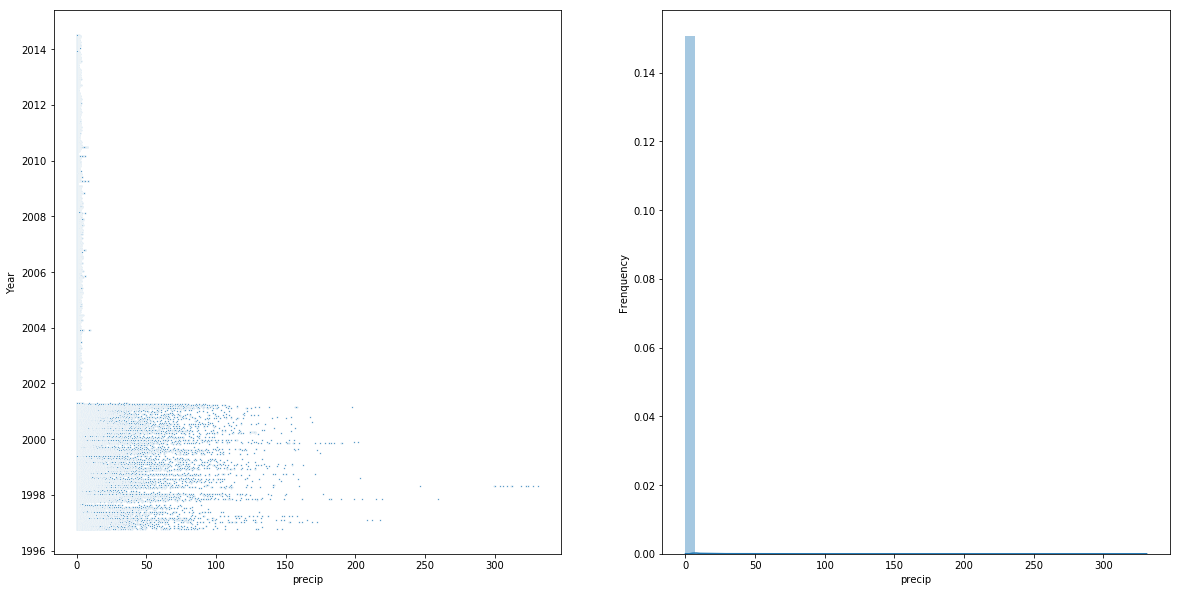

In [7]:
plot_1d(DS, ['precip'])

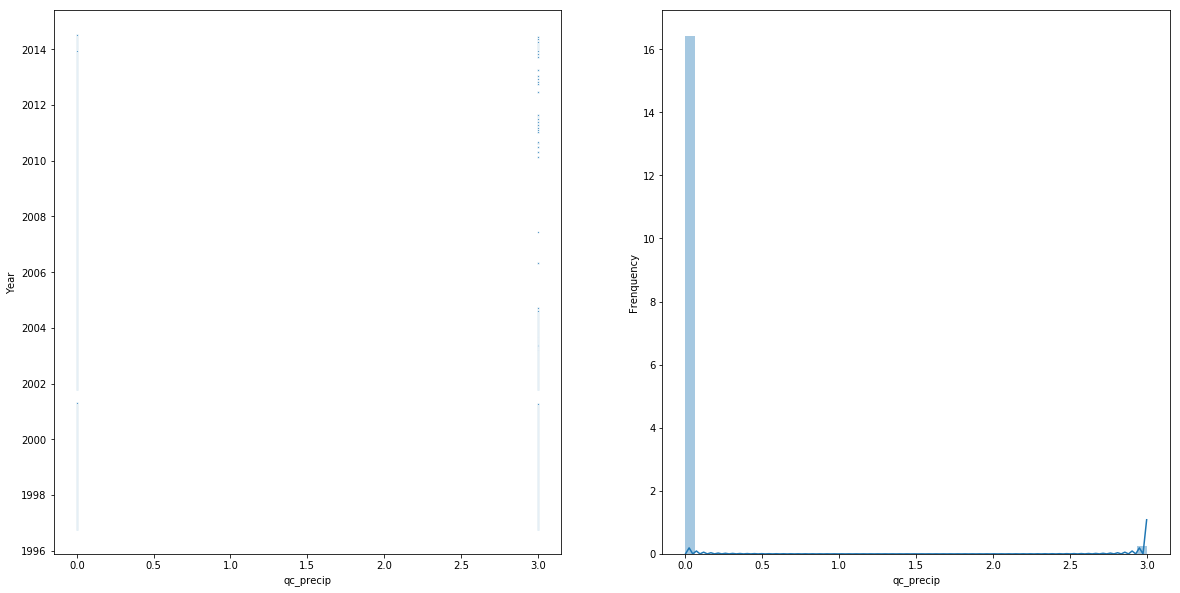

In [8]:
plot_1d(DS, ['qc_precip'])

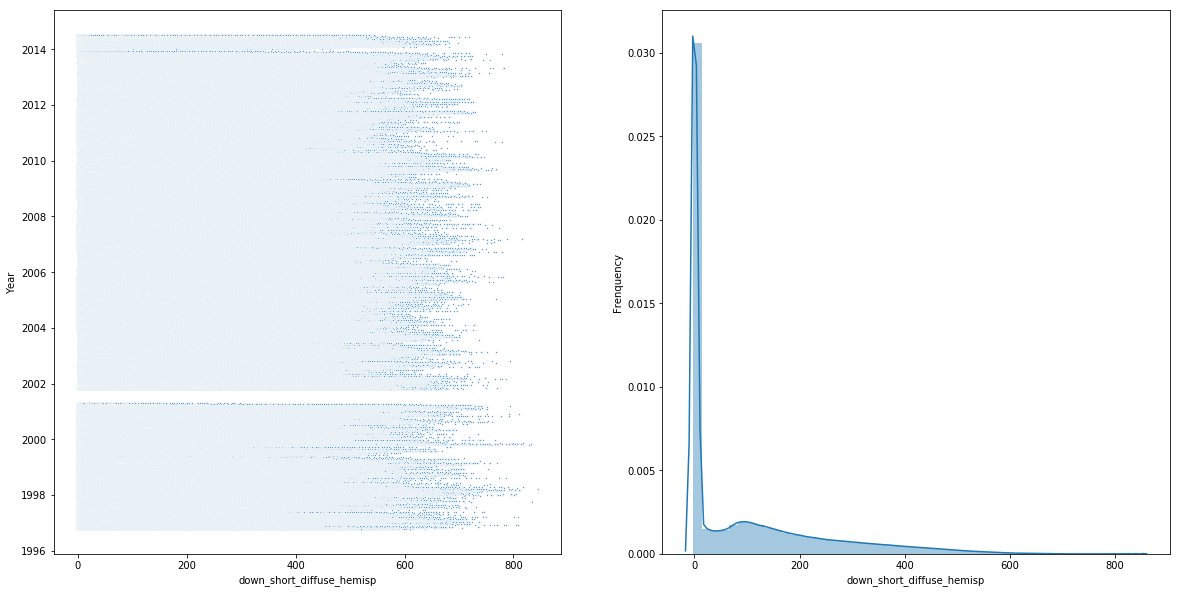

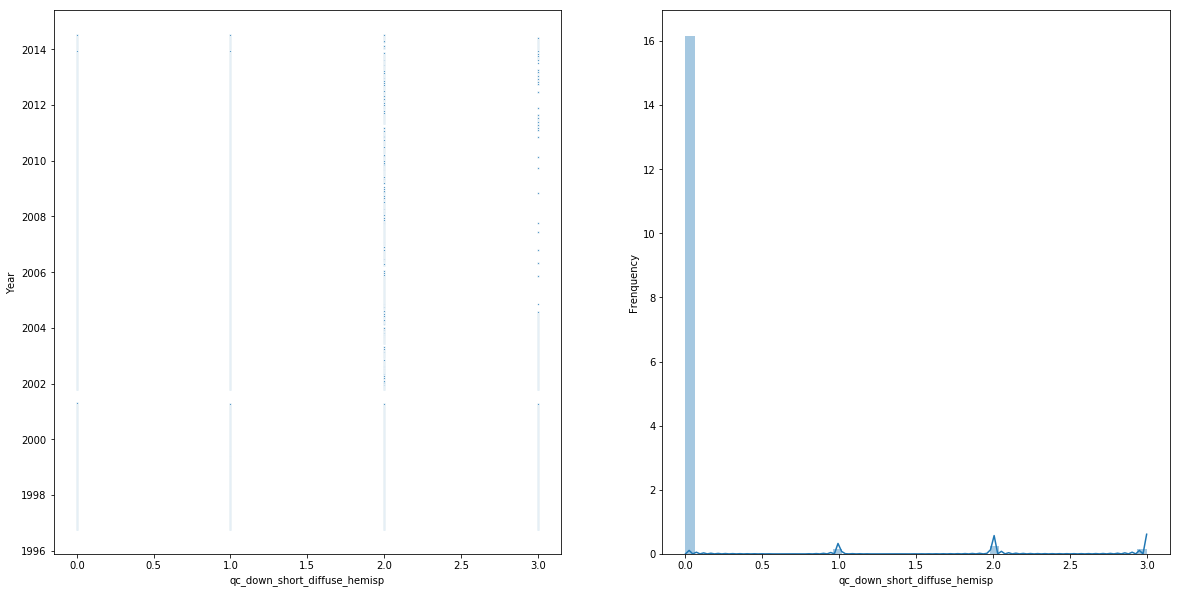

In [9]:
plot_1d(DS, ['down_short_diffuse_hemisp', 'qc_down_short_diffuse_hemisp'])

In [10]:
DS['qc_down_short_diffuse_hemisp'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

# Save DataSet

In [16]:
def save_netcdf(DS, FILE_PATH):
    DS.to_netcdf(FILE_PATH)
    print('Saved.')
    return None


def get_save_file_path(file_name, stage=1):
    CURRENT_DIR = os.getcwd()
    DATA_DIR = f'{CURRENT_DIR}/../../../data/stage-{stage}_cleaned'
    FILE_PATH = f'{DATA_DIR}/{file_name}'
    return FILE_PATH

In [14]:
DS_select = xr.merge([DS['down_short_diffuse_hemisp'],DS['qc_down_short_diffuse_hemisp']])

In [15]:
DS_select

<xarray.Dataset>
Dimensions:                       (time: 8904960)
Coordinates:
  * time                          (time) datetime64[ns] 1996-10-10 ... 2014-07-06T23:59:00
Data variables:
    down_short_diffuse_hemisp     (time) float32 dask.array<shape=(8904960,), chunksize=(1440,)>
    qc_down_short_diffuse_hemisp  (time) int32 dask.array<shape=(8904960,), chunksize=(1440,)>

In [17]:
# Save file
file_name = 'twpqcrad1longC1.cdf'
FILE_PATH = get_save_file_path(file_name)

save_netcdf(DS_select, FILE_PATH)

Saved.
